### Importing Libraries

In [143]:
# Wrangling libraries
import pandas as pd
import numpy as np

# Viz libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Stats libraries
from scipy.stats import chi2_contingency

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# NLP libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Oversampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

### Importing Data

In [144]:
da = pd.read_excel('capstone.xlsx', sheet_name = 'Cohort 3 DA')
da.head()

,Timestamp,ID No.,Age range,Gender,Country,Where did you hear about Everything Data?,How many years of learning experience do you have in the field of data?,Which track are you applying for?,How many hours per week can you commit to learning?,What is your main aim for joining the mentorship program?,What is your motivation to join the Everything Data mentorship program?,How best would you describe your skill level in the track you are applying for?,Have you completed the everything data aptitude test for your track?,Total score,Graduated
0,2024-12-03 16:25:30.208,DA301,18-24 years,Female,Kenya,WhatsApp,Less than six months,Data analysis,more than 14 hours,Learn data afresh,The hands-on program offers valuable real-worl...,Elementary - I have theoretical understanding ...,Yes,67.333333,Yes
1,2024-12-02 18:17:14.522,DA302,18-24 years,Male,Kenya,Twitter,Less than six months,Data analysis,7-14 hours,Build a project portfolio,The mentorship will be a catalytic opportunity...,Beginner - I have NO learning or work experien...,Yes,62.000000,No
2,2024-11-29 08:05:14.371,DA303,18-24 years,Male,Kenya,WhatsApp,6 months - 1 year,Data analysis,7-14 hours,Upskill,Desire to learn,Beginner - I have NO learning or work experien...,Yes,74.000000,No
3,2024-11-28 21:37:53.455,DA304,25-34 years,Male,Kenya,Twitter,1-3 years,Data analysis,7-14 hours,Build a project portfolio,My background knowledge in Computer Science dr...,Elementary - I have theoretical understanding ...,Yes,65.333333,No
4,2024-12-03 17:15:14.443,DA305,18-24 years,Male,Kenya,LinkedIn,6 months - 1 year,Data analysis,more than 14 hours,Build a project portfolio,To horn my skills in data analysis\nLand a dat...,Intermediate - I have theoretical knowledge an...,Yes,69.333333,No


### EDA & Hypothesis Testing

In [145]:
da.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Timestamp,52,NaN,NaN,NaN,2024-11-30 18:23:53.930211584,2024-11-27 09:15:48.555000,2024-11-28 14:46:28.480749824,2024-12-01 15:33:03.718500096,2024-12-02 16:13:13.010500096,2024-12-03 20:11:36.575000,NaN
ID No.,52,52,DA301,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age range,52,3,25-34 years,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,52,2,Male,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,52,1,Kenya,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Where did you hear about Everything Data?,52,6,Twitter,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
How many years of learning experience do you have in the field of data?,52,4,Less than six months,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Which track are you applying for?,52,2,Data analysis,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
How many hours per week can you commit to learning?,52,3,7-14 hours,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What is your main aim for joining the mentorship program?,52,4,Upskill,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


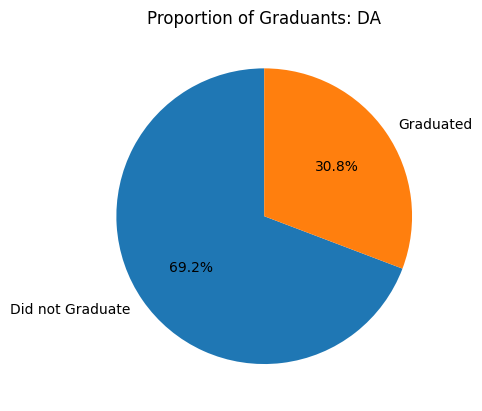

In [146]:
plt.pie(da['Graduated'].value_counts(), labels = ['Did not Graduate', 'Graduated'], autopct='%1.1f%%', startangle=90);
plt.title('Proportion of Graduants: DA');

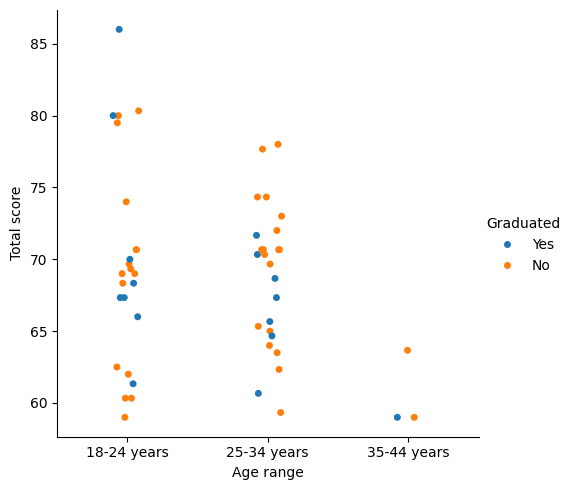

In [147]:
sns.catplot(x='Age range', y = 'Total score', data=da, hue = "Graduated")

In [148]:
# Build contingency table (Age vs target)
contingency = pd.crosstab(da['Age range'], da['Graduated'])
print("Contingency Table:\n", contingency)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print()
print(f"chi2 = {chi2}, p_value={p:.4f}")

Contingency Table:
 Graduated    No  Yes
Age range           
18-24 years  16    8
25-34 years  18    7
35-44 years   2    1

chi2 = 0.17333333333333345, p_value=0.9170


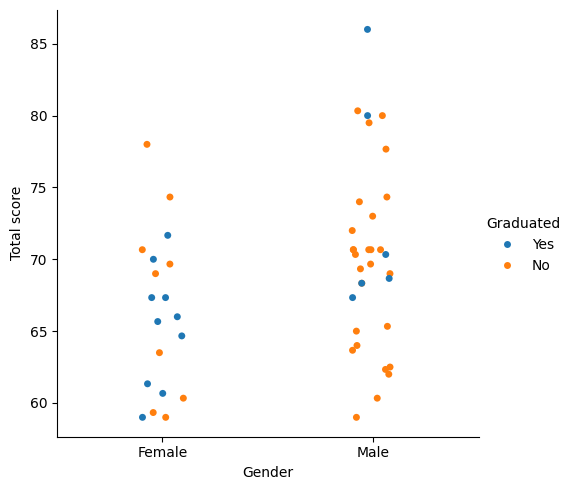

In [149]:
sns.catplot(x='Gender', y = 'Total score', data=da, hue = "Graduated");

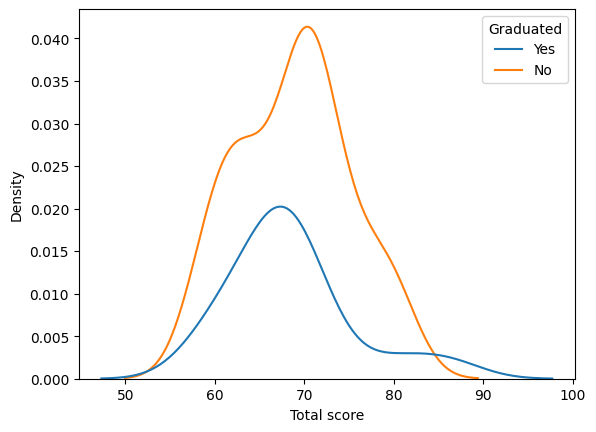

In [150]:
sns.kdeplot(x = 'Total score', data = da, hue = 'Graduated');

In [151]:
# Build contingency table (Gender vs target)
contingency = pd.crosstab(da['Gender'], da['Graduated'])
print("Contingency Table:\n", contingency)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print()
print(f"chi2 = {chi2}, p_value={p:.4f}")

Contingency Table:
 Graduated  No  Yes
Gender            
Female      9   10
Male       27    6

chi2 = 5.197811447811448, p_value=0.0226


In [152]:
from scipy.stats import mannwhitneyu

marks_graduated = da[da['Graduated']=='Yes']['Total score']
marks_not_graduated = da[da['Graduated']=='No']['Total score']

# Mann-Whitney U test
u_stat, p_val = mannwhitneyu(marks_graduated, marks_not_graduated, alternative='two-sided')

print("U statistic:", u_stat)
print("p-value:", p_val)


U statistic: 249.5
p-value: 0.4507265464539951


There may not be a statitically significant difference in how graduates and non-graduates score

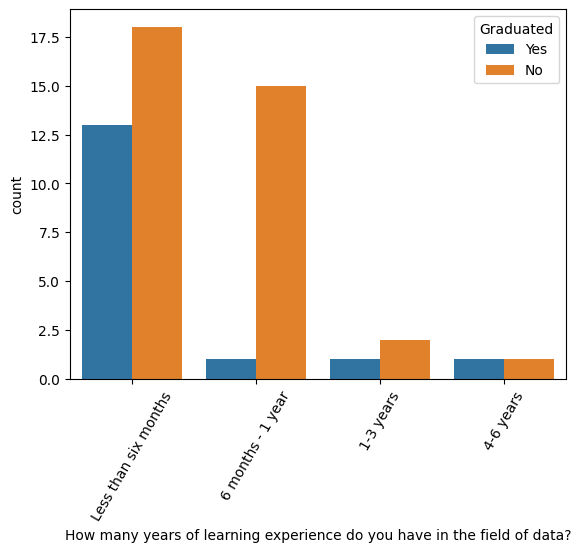

In [153]:
sns.countplot(x = 'How many years of learning experience do you have in the field of data?', data = da, hue = 'Graduated');
plt.xticks(rotation = 60);

In [154]:
# Build contingency table (XP vs target)
contingency = pd.crosstab(da['How many years of learning experience do you have in the field of data?'], da['Graduated'])
print("Contingency Table:\n", contingency)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print()
print(f"chi2 = {chi2}, p_value={p:.4f}")

Contingency Table:
 Graduated                                           No  Yes
How many years of learning experience do you ha...         
1-3 years                                            2    1
4-6 years                                            1    1
6 months - 1 year                                   15    1
Less than six months                                18   13

chi2 = 6.686622610513739, p_value=0.0826


In [155]:
da['Timestamp'] = pd.to_datetime(da['Timestamp'])
da['Timestamp'].min(), da['Timestamp'].max(), da['Timestamp'].max() - da['Timestamp'].min()

(Timestamp('2024-11-27 09:15:48.555000'),
 Timestamp('2024-12-03 20:11:36.575000'),
 Timedelta('6 days 10:55:48.020000'))

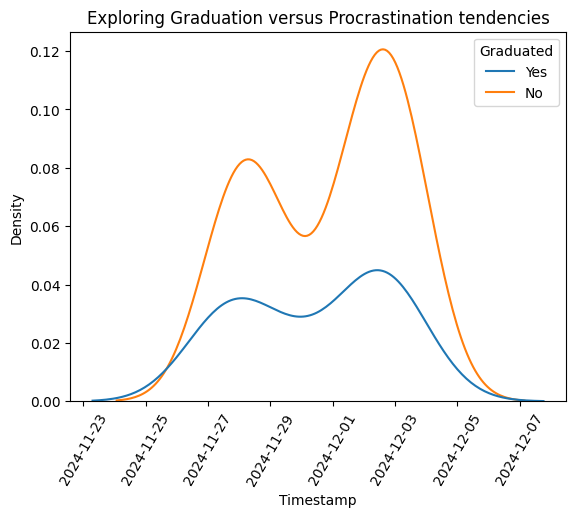

In [156]:
sns.kdeplot(x = 'Timestamp', data = da, hue = 'Graduated')
plt.xticks(rotation = 60);
plt.title('Exploring Graduation versus Procrastination tendencies'); # Assuming the data was from a survey during the program & was sent out at the same time

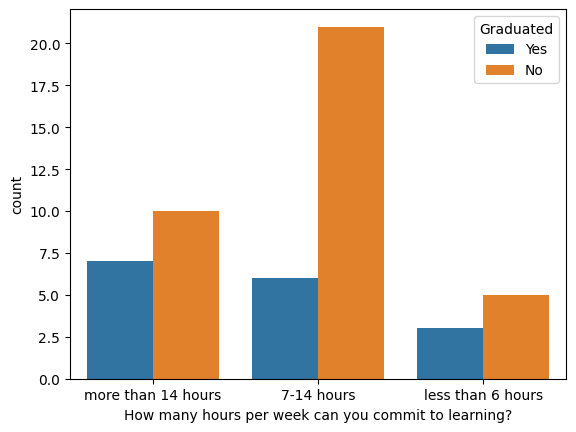

In [157]:
sns.countplot(x = 'How many hours per week can you commit to learning?', data = da, hue = 'Graduated');

In [158]:
# Build contingency table (Intended hours of commitment vs target)
contingency = pd.crosstab(da['How many hours per week can you commit to learning?'], da['Graduated'])
print("Contingency Table:\n", contingency)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print()
print(f"chi2 = {chi2}, p_value={p:.4f}")

Contingency Table:
 Graduated                                           No  Yes
How many hours per week can you commit to learn...         
7-14 hours                                          21    6
less than 6 hours                                    5    3
more than 14 hours                                  10    7

chi2 = 1.9604438997821352, p_value=0.3752


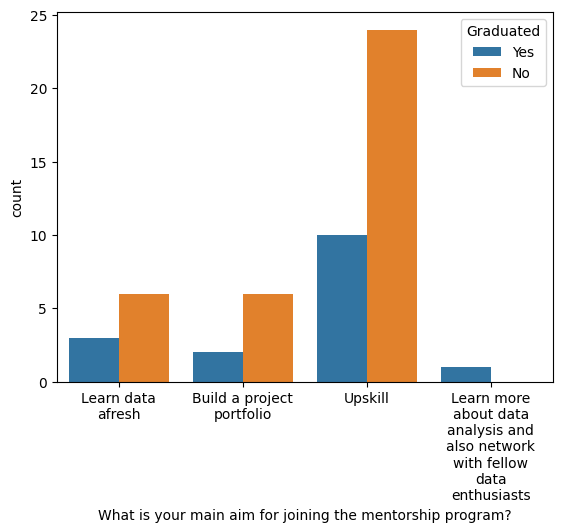

In [159]:
import textwrap

# Wrap x-axis labels
labels = [textwrap.fill(label, 15) for label in da['What is your main aim for joining the mentorship program?'].unique()]

da['What is your main aim for joining the mentorship program?'].value_counts()
sns.countplot(x= 'What is your main aim for joining the mentorship program?', data = da, hue = 'Graduated')
plt.xticks(ticks=range(len(labels)), labels = labels);

In [160]:
# Build contingency table (Aim vs target)
contingency = pd.crosstab(da['What is your main aim for joining the mentorship program?'], da['Graduated'])
print("Contingency Table:\n", contingency)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print()
print(f"chi2 = {chi2}, p_value={p:.4f}")

Contingency Table:
 Graduated                                           No  Yes
What is your main aim for joining the mentorshi...         
Build a project portfolio                            6    2
Learn data afresh                                    6    3
Learn more about data analysis and also network...   0    1
Upskill                                             24   10

chi2 = 2.43218954248366, p_value=0.4877


In [161]:
da['Where did you hear about Everything Data?'].value_counts()

Where did you hear about Everything Data?
Twitter          24
WhatsApp         17
LinkedIn          6
Word of mouth     3
Friend            1
Instagram         1
Name: count, dtype: int64

In [162]:
from scipy.stats import chi2_contingency

# Build contingency table (Info source vs target)
contingency = pd.crosstab(da['Where did you hear about Everything Data?'], da['Graduated'])
print("Contingency Table:\n", contingency)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print()
print(f"Chi2={chi2:.3f}, p={p:.4f}")

Contingency Table:
 Graduated                                  No  Yes
Where did you hear about Everything Data?         
Friend                                      1    0
Instagram                                   1    0
LinkedIn                                    5    1
Twitter                                    16    8
WhatsApp                                   11    6
Word of mouth                               2    1

Chi2=1.696, p=0.8894


In [163]:
da['How best would you describe your skill level in the track you are applying for?'].value_counts()

How best would you describe your skill level in the track you are applying for?
Elementary - I have theoretical understanding of basic data analysis/ data science concepts         28
Beginner - I have NO learning or work experience in data analysis/ data science                     16
Intermediate - I have theoretical knowledge and experience in data analysis/ data science            7
Advanced - I have deep knowledge and experience in advanced data analysis/ data science concepts     1
Name: count, dtype: int64

In [164]:
# Build contingency table (Info source vs target)
contingency = pd.crosstab(da['How best would you describe your skill level in the track you are applying for?'], da['Graduated'])
print("Contingency Table:\n", contingency)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print()
print(f"Chi2={chi2:.3f}, p={p:.4f}")

Contingency Table:
 Graduated                                           No  Yes
How best would you describe your skill level in...         
Advanced - I have deep knowledge and experience...   1    0
Beginner - I have NO learning or work experienc...  11    5
Elementary - I have theoretical understanding o...  19    9
Intermediate - I have theoretical knowledge and...   5    2

Chi2=0.487, p=0.9218


<Axes: xlabel='Have you completed the everything data aptitude test for your track?', ylabel='count'>

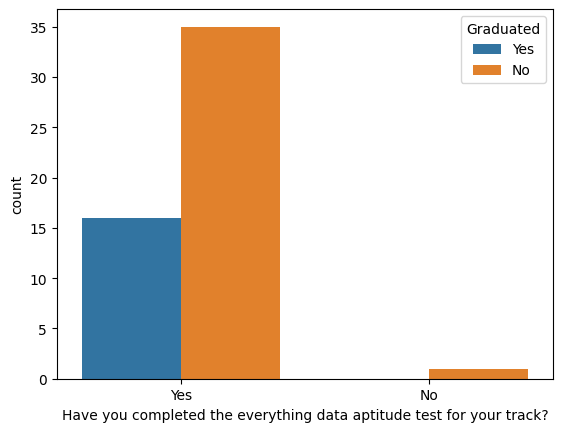

In [165]:
sns.countplot(x = 'Have you completed the everything data aptitude test for your track?',data = da, hue = 'Graduated')

### Feature Engineering

I wanted to investigate what motivated the students to join. I started by getting a word count of common terms and phrases used.

In [166]:
# Choose n-gram range (here we want single words + pairs)
vectorizer = CountVectorizer(ngram_range=(1,4), stop_words='english')

X = vectorizer.fit_transform(da['What is your motivation to join the Everything Data mentorship program?'])
phrases = vectorizer.get_feature_names_out()

# Count how often each phrase appears
counts = X.toarray().sum(axis=0)

# Put results in a DataFrame
common_phrases = pd.DataFrame({
    "phrase": phrases,
    "count": counts
}).sort_values(by="count", ascending=False)

print(common_phrases.head(20))

             phrase  count
366            data     71
1615         skills     17
1027          learn     16
371   data analysis     16
78         analysis     16
230          career     14
1056       learning     11
1097           like     10
1181     mentorship     10
734            gain      9
994       knowledge      9
1440        program      9
291       community      8
1274    opportunity      8
135       analytics      7
572          driven      7
1557        science      7
1241            new      6
1825          world      6
854            help      6


I also tried to group the motivations by topics identified by their answers as opposed to the answers in the aim question.

In [167]:
# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_tfidf = tfidf_vectorizer.fit_transform(da['What is your motivation to join the Everything Data mentorship program?'])

# Fit NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X_tfidf)

# Show top words per topic
n_top_words = 10
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Assign topics to docs
da['topic'] = nmf.transform(X_tfidf).argmax(axis=1)

Topic 0:
data analysis learning skills upskill finance science help platform wanted
Topic 1:
learn skill new desire job engineering analytics program gain life
Topic 2:
career opportunity advance connect professionals sharpen path data mentors portfolio
Topic 3:
program data mentorship driven world real join insights problems solve
Topic 4:
community like data knowledge minded individuals skills want improve learning


Seeing that the topics were heterogenous, I opted to define my own dictionary informed by the common words, phrases and topics.A shortcoming was that I could not use multiple labelling in instances where an enrollee was motivated by more than one thing.

In [168]:
custom_dict = {
    "Career Growth": ["career", "growth", "job", "promotion", "advance", "opportunity", 'portfolio', 'solve', 'problem', 'new'],
    "Networking": ["network", "connection", "community", "professionals"],
    "Upskill": ["skills", 'experience', 'learn', 'upskill', 'knowledge', 'platform'],
    "Mentorship": ["mentor", "guidance", "support", "mentorship", 'interact', 'minded', 'professional']
}

def map_custom_topics(text, dictionary):
    text = str(text).lower()
    for theme, keywords in dictionary.items():
        if any(word in text for word in keywords):
            return theme
    return "Other"

da["custom_topic"] = da["What is your motivation to join the Everything Data mentorship program?"].apply(
    lambda x: map_custom_topics(x, custom_dict)
)

In [169]:
from scipy.stats import chi2_contingency

# Build contingency table (motivation vs target)
contingency = pd.crosstab(da['custom_topic'], da['Graduated'])
#print("Contingency Table:\n", contingency)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print()
print(f"Chi2={chi2:.3f}, p={p:.4f}")


Chi2=9.473, p=0.0503


Testing for correlation with previous column

In [170]:
contingency = pd.crosstab(da['custom_topic'], da['What is your main aim for joining the mentorship program?'])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print()
print(f"Chi2={chi2:.3f}, p={p:.4f}")


Chi2=5.687, p=0.9310


### Modelling

In [171]:
da.columns

Index(['Timestamp', 'ID No.', 'Age range', 'Gender', 'Country',
       'Where did you hear about Everything Data?',
       'How many years of learning experience do you have in the field of data?',
       'Which track are you applying for?',
       'How many hours per week can you commit to learning?',
       'What is your main aim for joining the mentorship program?',
       'What is your motivation to join the Everything Data mentorship program?',
       'How best would you describe your skill level in the track you are applying for?',
       'Have you completed the everything data aptitude test for your track?',
       'Total score', 'Graduated', 'topic', 'custom_topic'],
      dtype='object')

I opted to go for the features with p-values less than 0.5.

In [172]:
categorical = [col for col in da.columns if col not in  (['ID No.', 'Country', 'Which track are you applying for?', 
                                                        'Have you completed the everything data aptitude test for your track?',
                                                        'Graduated', 'Total score', 'Timestamp', 'Age range', 
                                                        'Where did you hear about Everything Data?', 'Which track are you applying for?',
                                                        'What is your motivation to join the Everything Data mentorship program?',
                                                        'How best would you describe your skill level in the track you are applying for?',
                                                        'topic'])]

print('\n' .join(categorical))

numeric = ['Total score']

X = da[categorical + numeric]

y = da['Graduated'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Gender
How many years of learning experience do you have in the field of data?
How many hours per week can you commit to learning?
What is your main aim for joining the mentorship program?
custom_topic


Due to the small sample size, we will use either a Gradient Boosting Classifier or a SVM

In [173]:
preprocessor = ColumnTransformer( # for distance_based SVM
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", StandardScaler(), numeric)
    ]
)

In [174]:
non_distance_preprocessor = ColumnTransformer( # for GB classifier
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
    ]
)

In [175]:
gb_pipeline = Pipeline(steps=[
    ("preprocess", non_distance_preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", GradientBoostingClassifier(random_state=42))
])

In [176]:
svm_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", SVC(probability=True, class_weight='balanced', random_state=42))
])

In [177]:
scores_gb = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring="f1")
scores_svm = cross_val_score(svm_pipeline, X_train, y_train, cv=5, scoring="f1")

print("Gradient Boosting CV f1:", scores_gb.mean())
print("SVM CV f1:", scores_svm.mean())

Gradient Boosting CV f1: 0.3333333333333333
SVM CV f1: 0.43809523809523804


SVM performs much better

In [178]:
param_grid_svm = {
    "clf__kernel": ["linear", "rbf"],
    "clf__C": [0.1, 1, 10],
    "clf__gamma": ["scale", "auto"]
}

grid_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring="f1", n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best SVM params:", grid_svm.best_params_)
print("Best SVM CV score:", grid_svm.best_score_)

Best SVM params: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Best SVM CV score: 0.5347619047619048


In [179]:
y_pred_svm = grid_svm.predict(X_test)

print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.60      1.00      0.75         3

    accuracy                           0.82        11
   macro avg       0.80      0.88      0.80        11
weighted avg       0.89      0.82      0.83        11



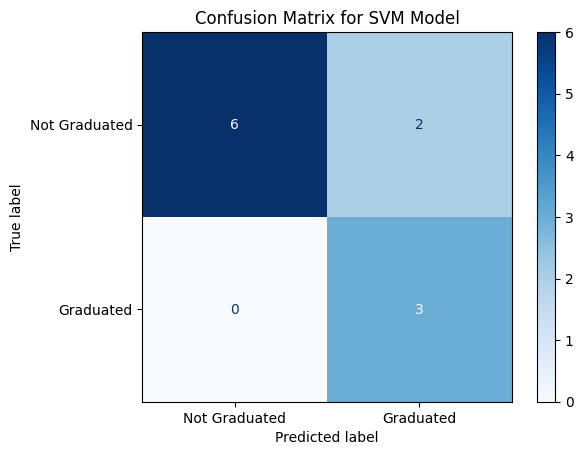

In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Graduated', 'Graduated'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM Model")
plt.show()


### Testing our model for generalisation

Now that we have a model trained on the Data Analytics Cohort, let us see how our model performs for the Data Science Cohort

In [181]:
ds = pd.read_excel('capstone.xlsx', sheet_name = 'Cohort 3 DS')

ds.head()

,Timestamp,Id. No,Age range,Gender,Country,Where did you hear about Everything Data?,How many years of learning experience do you have in the field of data?,Which track are you applying for?,How many hours per week can you commit to learning?,What is your main aim for joining the mentorship program?,What is your motivation to join the Everything Data mentorship program?,How best would you describe your skill level in the track you are applying for?,Have you completed the everything data aptitude test for your track?,Total score,Graduated
0,2024-12-01 23:50:47.202,DS301,18-24 years,Male,Kenya,Word of mouth,Less than six months,Data science,less than 6 hours,Upskill,to enter into the data analysis career,Beginner - I have NO learning or work experien...,Yes,58.666667,No
1,2024-12-03 09:35:19.407,DS302,25-34 years,Male,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,To grow and improve my skills in data science ...,Elementary - I have theoretical understanding ...,Yes,70.000000,No
2,2024-12-03 19:16:49.376,DS303,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate - I have theoretical knowledge an...,Yes,64.333333,Yes
3,2024-12-03 12:52:35.541,DS304,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,7-14 hours,Upskill,I'd like to upskill and Join the Data Community,Intermediate - I have theoretical knowledge an...,Yes,75.000000,No
4,2024-12-03 18:12:27.159,DS305,18-24 years,Male,Kenya,WhatsApp,Less than six months,Data science,7-14 hours,Upskill,I aim to join the mentorship program to enhanc...,Beginner - I have NO learning or work experien...,Yes,59.000000,No


In [186]:
ds['Graduated'].value_counts()

Graduated
No     48
Yes    15
Name: count, dtype: int64

Introducing our engineered feature custom_topic

In [182]:
ds["custom_topic"] = ds["What is your motivation to join the Everything Data mentorship program?"].apply(lambda x: map_custom_topics(x, custom_dict))

In [183]:
X_ds = ds[categorical + numeric]

y_ds = ds['Graduated'].map({'Yes': 1, 'No': 0})

In [184]:
y_ds_pred_svm = grid_svm.predict(X_ds)

print("SVM:\n", classification_report(y_ds_pred_svm, y_ds))

SVM:
               precision    recall  f1-score   support

           0       0.60      0.72      0.66        40
           1       0.27      0.17      0.21        23

    accuracy                           0.52        63
   macro avg       0.44      0.45      0.43        63
weighted avg       0.48      0.52      0.50        63



Unfortunately, the model performs very slightly better than random. We can attribute this to overfitting a small sample. 